<a href="https://colab.research.google.com/github/Yogesh31Hasabe/technohosting/blob/master/fastaiYSHCompVision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Pratical of Image classification of Cucumber and Green zuchinni.
##Hands on Learning of fast.ai course of Deep Leaning part 1 (ls no 1 & 2)

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Now we import the fastai inbuilt liabraries here.

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.metrics import accuracy

### We create our datasets for each object separately from Google Images using Javascript Command.
###Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels

In [0]:
#Run this cell 1st
folder = 'cucumber'
file = 'cucumber.txt'

In [0]:
#Run this cell 5th
folder = 'zuchini'
file = 'zuchini.txt'

You will need to run this cell once per each category.

In [0]:
#Run this cell 2nd & 6th
path = Path('data/veges')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [9]:
path.ls()

[PosixPath('data/veges/cucumber'),
 PosixPath('data/veges/cucumber.txt'),
 PosixPath('data/veges/models'),
 PosixPath('data/veges/zuchini'),
 PosixPath('data/veges/zuchini.txt')]

## Download images

You will need to run this line once for every category

In [10]:
#run this cell 3rd & 7th
download_images(path/file, dest, max_pics=700,max_workers=0)

In [0]:
classes = ['cucumber','zuchini']

Then we can remove any images that can't be opened:

In [12]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=700)

cucumber


zuchini


## Its time to View Data..

Here we segregate dataset into Training(train_ds) and Validation(valid_ds) Sets accordingly.

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

### Let's have a look at Pictures..

In [14]:
data.classes

['cucumber', 'zuchini']

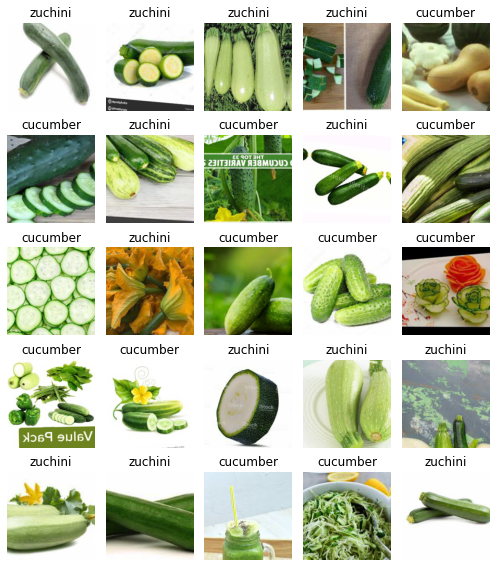

In [15]:
data.show_batch(rows=5, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cucumber', 'zuchini'], 2, 512, 128)

## Train the Model

In [17]:
learn = cnn_learner(data,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.955121,0.773695,0.171875,00:06
1,0.680162,0.808297,0.187500,00:06
2,0.598585,0.809436,0.187500,00:06
3,0.510804,0.737455,0.179688,00:06


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [0]:
learn.save('stage-1')

## Interpretation

We will first see were the model got most confused with one another.We'll also look at Confusion Matrix

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

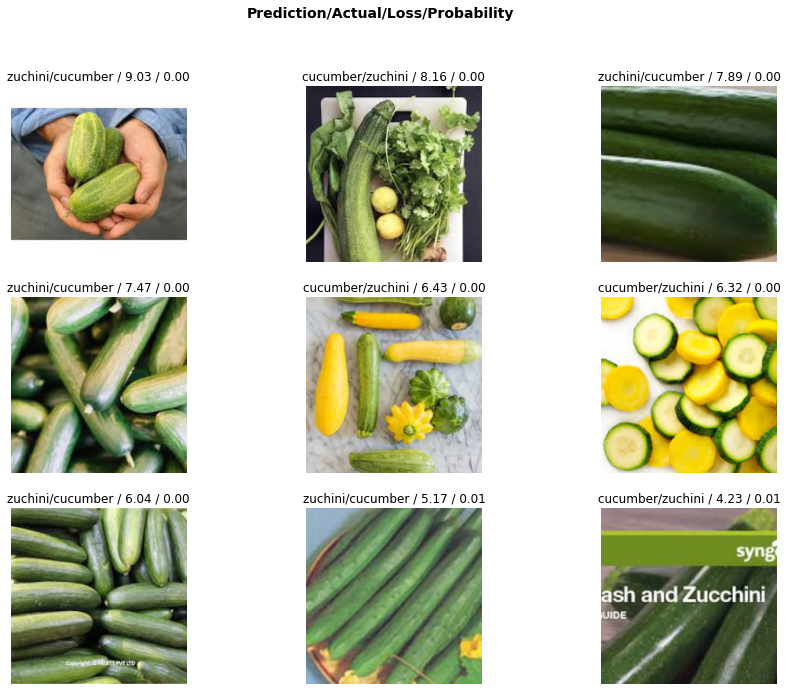

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

Confusion Matrix

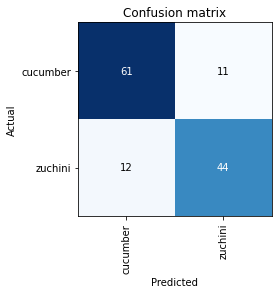

In [22]:
interp.plot_confusion_matrix()

## Fine Tuning 
Checking the most suited learning rate

In [0]:
learn.load('stage-1');

In [24]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


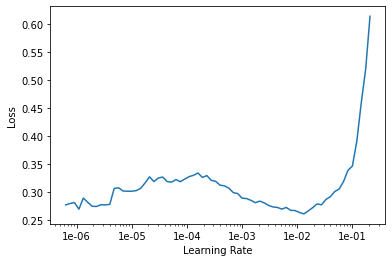

In [25]:
learn.recorder.plot()

In [0]:
learn.unfreeze()


In [28]:
learn.fit_one_cycle(2,max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.078615,0.605295,0.164062,00:06
1,0.073397,0.576392,0.171875,00:06


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

## Checking some Random Prections

### Predictions

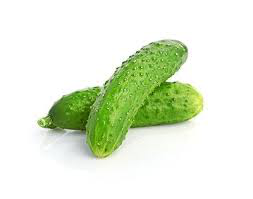

In [0]:
img = open_image(path/'cucumber'/'00000059.jpg')
img

We create our Learner in production enviromnent like this, just make sure that path contains the file 'export.pkl' from before.

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

tensor([1.0000e+00, 1.1340e-07])